In [1]:
import pandas as pd
from statsmodels.tsa import stattools
from statsmodels.graphics.tsaplots import *
from arch.unitroot import ADF
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
GE = pd.read_csv('GE.csv', parse_dates=True, index_col='Date')

In [3]:
close = GE.Close
GERet = (close-close.shift(1))/close
GERet = GERet.dropna()
GERet.head()

Date
1962-01-03   -0.010135
1962-01-04   -0.011966
1962-01-05   -0.026316
1962-01-08   -0.001757
1962-01-09    0.005245
Name: Close, dtype: float64

c:\users\rongf\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
c:\users\rongf\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,
c:\users\rongf\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1029: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,


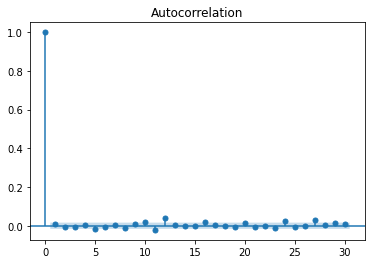

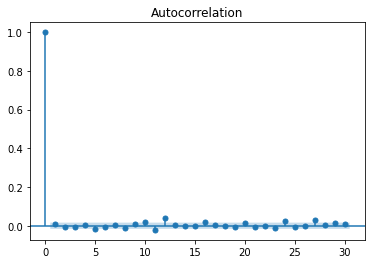

In [23]:
acfs = stattools.acf(GERet)
acfs[:5]
pacfs = stattools.pacf(GERet)
pacfs[:5]
plot_acf(GERet,use_vlines=True,lags=30)

Text(0.5, 1.0, '1970-2021')

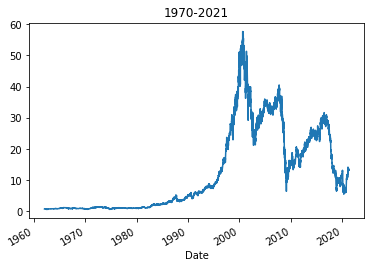

In [5]:
close.plot()
plt.title("1970-2021")

Text(0.5, 1.0, '1970-2021')

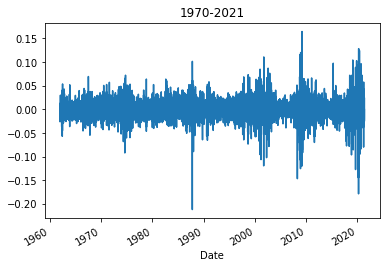

In [6]:
GERet.plot()
plt.title("1970-2021")

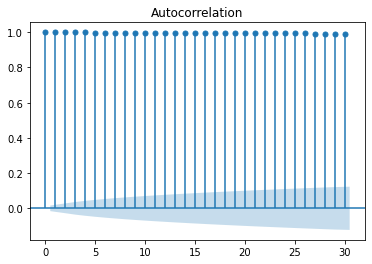

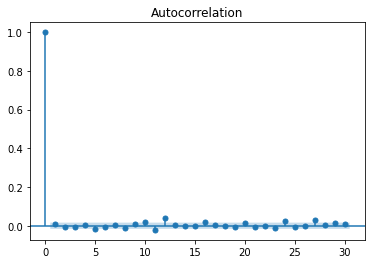

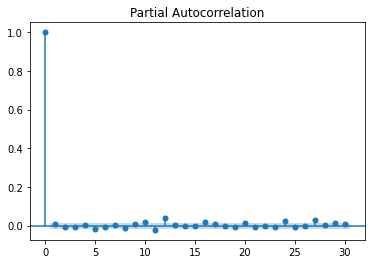

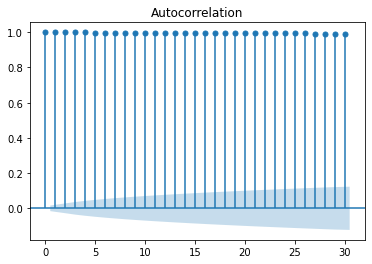

In [7]:
plot_acf(GERet,use_vlines=True,lags=30)
plot_pacf(GERet,use_vlines=True,lags=30)
plot_acf(close,use_vlines=True,lags=30)

In [20]:
print(sm.stats.acorr_ljungbox(GERet, lags=[2]))
print(sm.stats.acorr_ljungbox(GERet, lags=[9]))

(array([1.66918492]), array([0.43405134]))
(array([10.51980898]), array([0.31006329]))


In [19]:
LjungBox1=stattools.q_stat(stattools.acf(GERet)[1:13],len(GERet))
LjungBox1
LjungBox1[1][-1]

LjungBox2=stattools.q_stat(stattools.acf(close)[1:13],len(GERet))
LjungBox2[1][-1]

0.0

---
<font size=6>**10**</font>

In [10]:
SP500 = pd.read_csv('Download Data - INDEX_US_S&P US_SPX.csv', parse_dates=True, index_col='Date')

In [11]:
close = SP500.Close
SP500Ret = (len(close)-close.shift(1))/close
SP500Ret = SP500Ret.dropna()
SP500Ret.head()

Date
2021-05-05   -0.947459
2021-05-04   -0.939954
2021-05-03   -0.932978
2021-04-30   -0.942239
2021-04-29   -0.932731
Name: Close, dtype: float64

c:\users\rongf\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:1029: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,


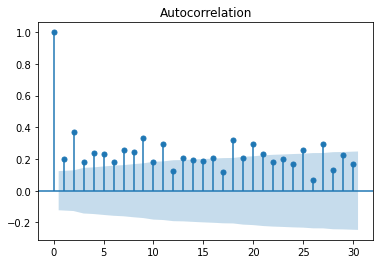

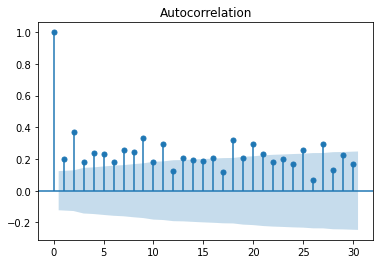

In [22]:
acfs = stattools.acf(SP500Ret)
acfs[:5]
pacfs = stattools.pacf(SP500Ret)
pacfs[:5]
plot_acf(SP500Ret,use_vlines=True,lags=30)

Text(0.5, 1.0, '2020-2021')

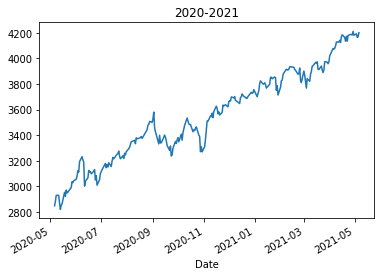

In [13]:
close.plot()
plt.title("2020-2021")

Text(0.5, 1.0, '2020-2021')

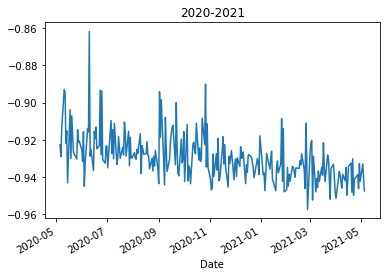

In [14]:
SP500Ret.plot()
plt.title("2020-2021")

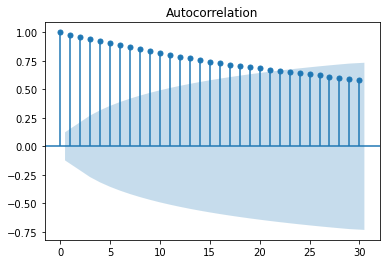

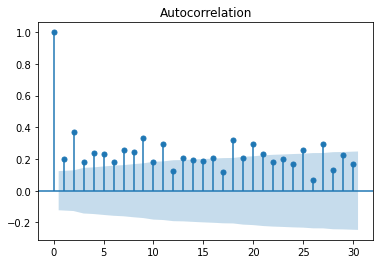

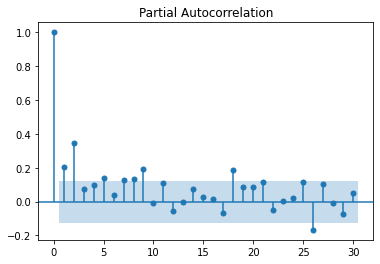

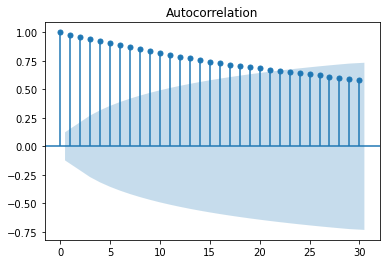

In [15]:
plot_acf(SP500Ret,use_vlines=True,lags=30)
plot_pacf(SP500Ret,use_vlines=True,lags=30)
plot_acf(close,use_vlines=True,lags=30)

In [16]:
adf_SP500Ret=ADF(SP500Ret)
print(adf_SP500Ret.summary().as_text())
adfclose=ADF(close)
print(adfclose.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -1.577
P-value                         0.495
Lags                               10
-------------------------------------

Trend: Constant
Critical Values: -3.46 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
   Augmented Dickey-Fuller Results   
Test Statistic                 -0.438
P-value                         0.904
Lags                                6
-------------------------------------

Trend: Constant
Critical Values: -3.46 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [21]:
LjungBox1=stattools.q_stat(stattools.acf(SP500Ret)[1:13],len(SP500Ret))
LjungBox1
LjungBox1[1][-1]

LjungBox2=stattools.q_stat(stattools.acf(close)[1:13],len(SP500Ret))
LjungBox2[1][-1]

0.0